In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

In [46]:
#Load in kinds of sales in for each year as separate data frames
years = range(2018, 2024)
names = ['apartments', 'commercial', 'mixed_use', 'residential', 'vacant']

for name in names:
    name_df = pd.DataFrame()
    df_name = name + '_df'
    for year in years:
        file_path = f'Data/ar-rec-{year}-{name}.xlsx'
        df = pd.read_excel(file_path)
        df['year'] = year
        name_df = pd.concat([name_df, df], ignore_index=True)  # Assign the result back to name_df
    globals()[df_name] = name_df  # Assign name_df to the global variable



In [47]:
# Only keep where city is boulder, remove price outliers, convert sale date to datetime
list_of_df_names = ['apartments_df', 'commercial_df', 'mixed_use_df', 'residential_df', 'vacant_df']
for df_name in list_of_df_names:
    df = globals()[df_name]
    df = df[df['LOCCITY'] == 'BOULDER']
    df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
    Q1 = df['SALE_PRICE'].quantile(0.25)
    Q3 = df['SALE_PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[~((df['SALE_PRICE'] < lower_bound) | (df['SALE_PRICE'] > upper_bound))]
    globals()[df_name] = df_cleaned


/var/folders/fy/_czc97ms4jlfws8v8brr4zlr0000gn/T/ipykernel_79649/654118904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
/var/folders/fy/_czc97ms4jlfws8v8brr4zlr0000gn/T/ipykernel_79649/654118904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
/var/folders/fy/_czc97ms4jlfws8v8brr4zlr0000gn/T/ipykernel_79649/654118904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [48]:
# Converting all to new CSV files
# apartments_df.to_csv('apartment_sales.csv')
# commercial_df.to_csv('commercial_sales.csv')
# mixed_use_df.to_csv('mixed_use_sales.csv')
# residential_df.to_csv('residential_sales.csv')
# vacant_df.to_csv('vacant_sales.csv')

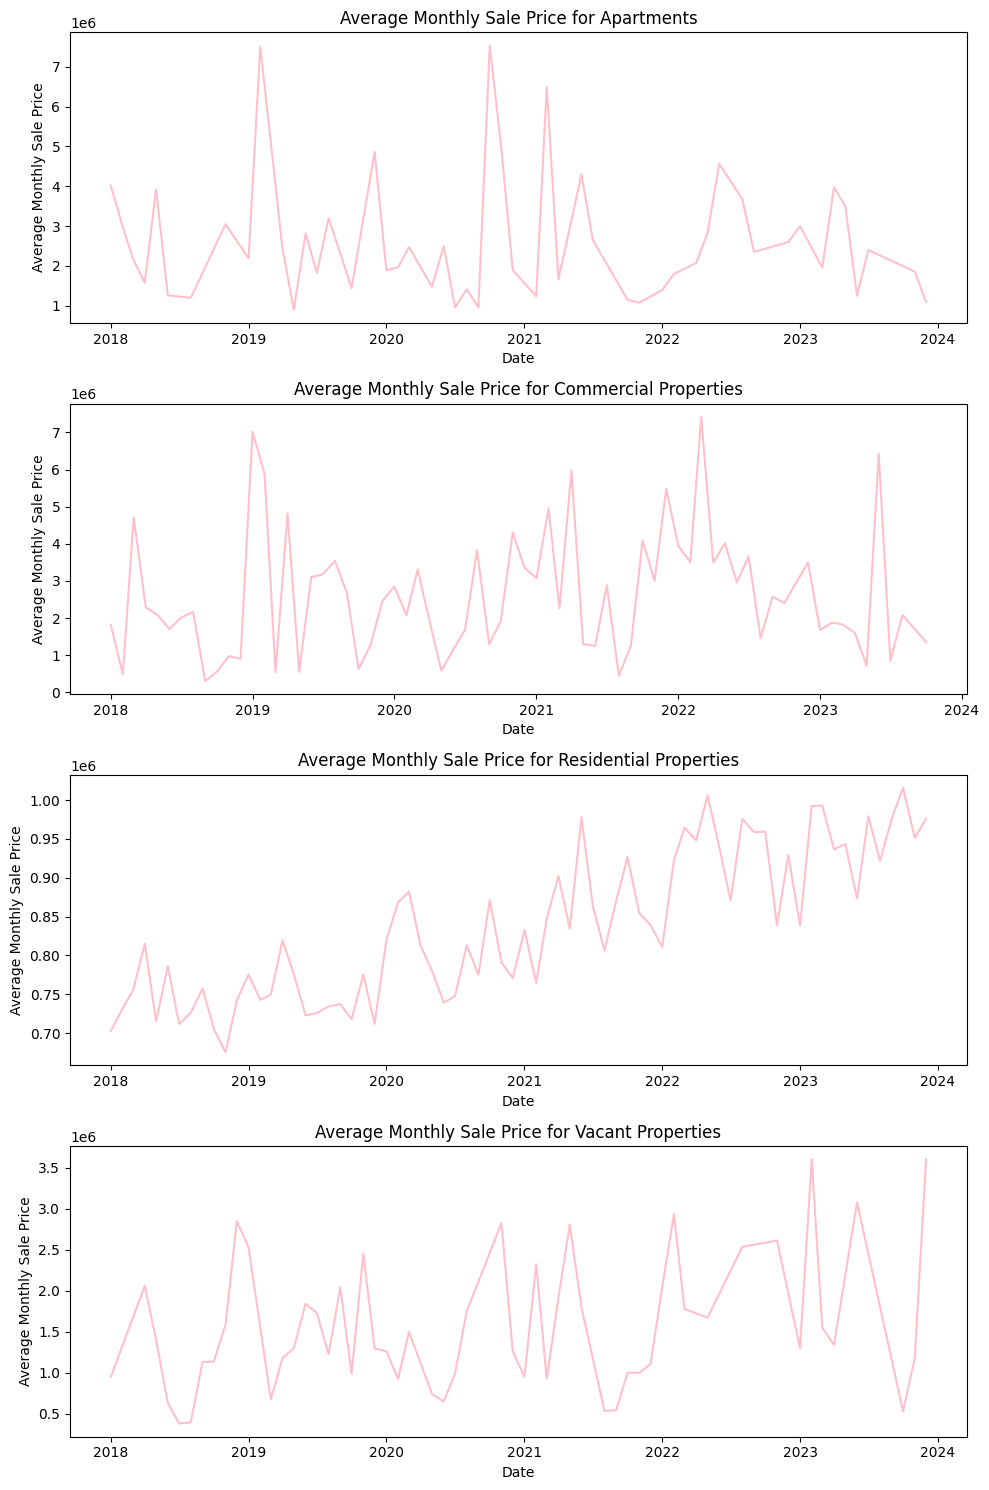

In [49]:
# Plotting monthly trends over time
list_of_dfs = [apartments_df, commercial_df, residential_df, vacant_df]
list_of_titles = ['Average Monthly Sale Price for Apartments', 'Average Monthly Sale Price for Commercial Properties', 
                  'Average Monthly Sale Price for Residential Properties', 'Average Monthly Sale Price for Vacant Properties']

fig, axs = plt.subplots(4, 1, figsize=(10, 15))
for i, (df, title) in enumerate(zip(list_of_dfs, list_of_titles)):
    df['month'] = df['SALE_DATE'].dt.month
    df['year'] = df['SALE_DATE'].dt.year
    average_price_by_month_year = df.groupby(['year', 'month'])['SALE_PRICE'].mean()

    years_months = list(average_price_by_month_year.keys())
    date_objects = [datetime(year, month, 1) for year, month in years_months]
    values = list(average_price_by_month_year.values)
    
    plot = axs[i].plot(date_objects, values, color='pink')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Average Monthly Sale Price')
    axs[i].set_title(title)

plt.tight_layout()
plt.show()

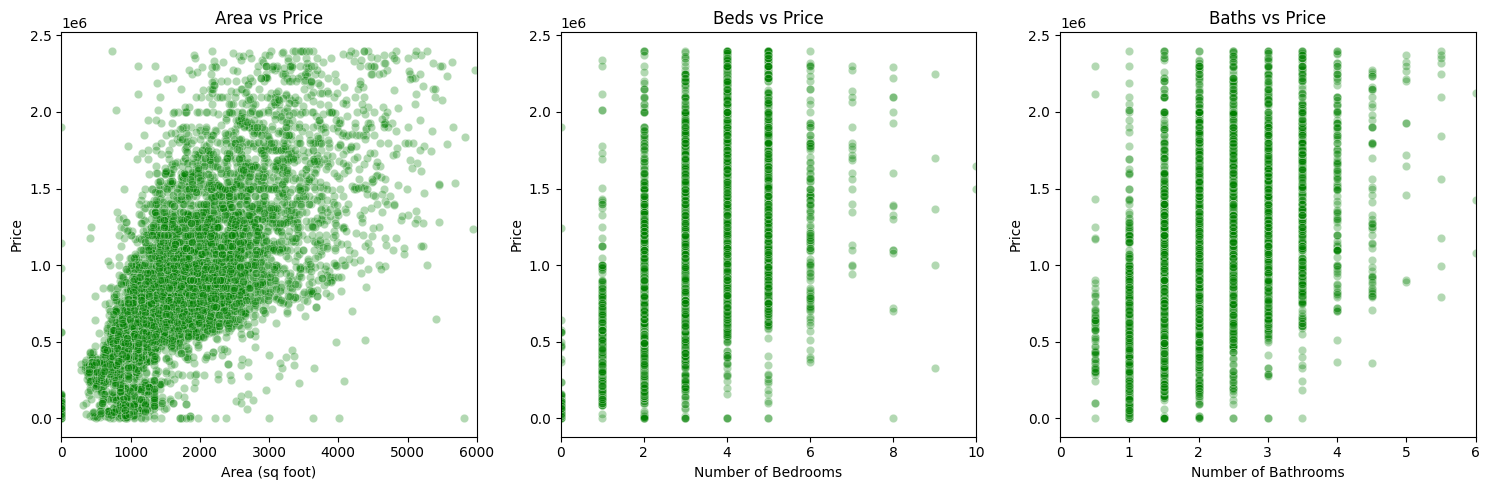

In [51]:
# Making a plot of square footage, beds, and baths vs price
residential_df['area'] = residential_df['ABOVE_GROUND_SQFT'] + residential_df['FINISHED_BSMT_SQFT'] + residential_df['STUDIO_SQFT']
residential_df['baths'] = residential_df['FULL_BATHS'] + (0.5)*residential_df['THREE_QTR_BATHS'] + (0.5)*residential_df['HALF_BATHS']
baths_mean = int(residential_df['baths'].mean())
residential_df['baths'] = residential_df['baths'].mask(residential_df['baths'] == 0, baths_mean)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='area', y='SALE_PRICE', data=residential_df, color = 'green', alpha = 0.3)
plt.xlabel('Area (sq foot)')
plt.xlim(0, 6000)
plt.ylabel('Price')
plt.title('Area vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(x='BEDROOMS', y='SALE_PRICE', data=residential_df, color = 'green', alpha = 0.3)
plt.xlabel('Number of Bedrooms')
plt.xlim(0, 10)
plt.ylabel('Price')
plt.title('Beds vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(x='baths', y='SALE_PRICE', data=residential_df, color = 'green', alpha = 0.3)
plt.xlabel('Number of Bathrooms')
plt.xlim(0, 6)
plt.ylabel('Price')
plt.title('Baths vs Price')

plt.tight_layout()
plt.show()